# ARIMA 

In [ ]:
%matplotlib inline
import yfinance as yf
import quantstats as qs
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

In [9]:
# Import ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

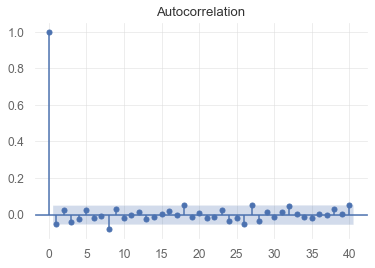

In [10]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df.AMZN, lags=40);

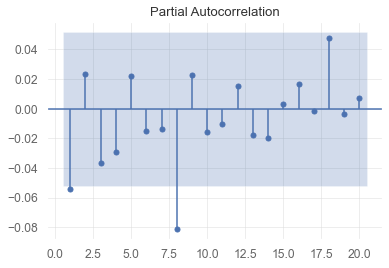

In [11]:
# Plot PACF
plot_pacf(df.AMZN, zero=False, lags=20);

In [12]:
from statsmodels.tsa.stattools import adfuller
adfuller(df.AMZN)

(-39.77918247910233,
 0.0,
 0,
 1422,
 {'1%': -3.4349569928153607,
  '5%': -2.863574667579351,
  '10%': -2.5678532457009697},
 -7183.534342486491)

In [13]:
# Run ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# Create the ARIMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags

model = ARIMA(df['AMZN'].values, order=(1,1,1))


In [14]:
# Fit the model to the data
result_ARMA = model.fit()

C:\Users\User\anaconda3\envs\algotrading\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [15]:
# Display model summary
result_ARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1422
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3650.104
Method:                       css-mle   S.D. of innovations              0.019
Date:                Thu, 26 Aug 2021   AIC                          -7292.208
Time:                        18:59:14   BIC                          -7271.169
Sample:                             1   HQIC                         -7284.349
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.718e-07   1.02e-05      0.027      0.979   -1.97e-05    2.02e-05
ar.L1.D.y     -0.0528      0.027     -1.925      0.054      -0.106       0.001
ma.L1.D.y     -0.9790      0.017    -58.847      0.000      -1.012      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -18.9510           +0.0000j           18.9510            0.5000
MA.1            1.0215           +0.0000j            1.0215            0.0000
-----------------------------------------------------------------------------
"""

In [16]:
pd.DataFrame(results.forecast(steps=30)[0]).plot(title="30 Days Forecast")

NameError: name 'results' is not defined

# GARCH


In [17]:
import arch as arch
from arch import arch_model

ModuleNotFoundError: No module named 'arch'

In [18]:
#!pip install arch

In [32]:
# 'p' and 'q'  are akin to the 'p' and 'q' of an ARMA model.
# 'vol="GARCH"' means that we're using a GARCH model.
# The 'mean="Zero"' means that we're estimating a GARCH.

model = arch_model(df['AMZN'], vol="GARCH", p=1, q=1)


In [33]:
# Fit the GARCH Model
result_GARCH = model.fit(disp="off")

In [34]:
# Output the model summary
result_GARCH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   AMZN   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3788.80
Distribution:                  Normal   AIC:                          -7569.61
Method:            Maximum Likelihood   BIC:                          -7548.57
                                        No. Observations:                 1423
Date:                Thu, Aug 26 2021   Df Residuals:                     1422
Time:                        15:59:35   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.0021e-03  5.192e-04      3.856  1.151e-04 [9.846e-04,3.020e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.4094e-05  3.465e-06      9.840  7.597e-23 [2.730e-05,4.088e-05]
alpha[1]       0.2000  4.189e-02      4.774  1.803e-06     [  0.118,  0.282]
beta[1]        0.7000  3.755e-02     18.643  1.445e-77     [  0.626,  0.774]
============================================================================

Covariance estimator: robust
"""

In [35]:
# Find the last day of the dataset
last_day = df.index.max().strftime('%Y-%m-%d')
last_day

'2021-08-25'

In [36]:
# Create a 30 day forecast 
forecast_horizon = 30
forecasts = result_GARCH.forecast(start=last_day, horizon=forecast_horizon)

In [37]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.21,h.22,h.23,h.24,h.25,h.26,h.27,h.28,h.29,h.30
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-25,0.217061,0.225822,0.233426,0.240063,0.245884,0.251007,0.25553,0.259534,0.263085,0.26624,...,0.284954,0.28578,0.286522,0.287188,0.287786,0.288324,0.288806,0.28924,0.28963,0.28998


In [38]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2021-08-25
h.01,0.217061
h.02,0.225822
h.03,0.233426
h.04,0.240063
h.05,0.245884


<AxesSubplot:title={'center':'30 Day Forecast for AMZN'}>

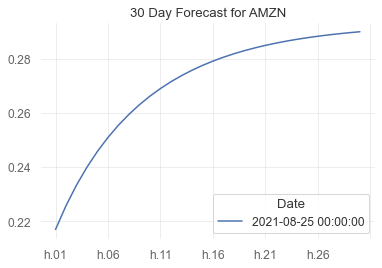

In [39]:
# Plot the final forecast
final.plot(title="30 Day Forecast for AMZN")